In [9]:
import numpy as np
import h5py
import os
from obspy.core import read, UTCDateTime
from obspy.io.sac.util import get_sac_reftime
from obspy.signal.filter import lowpass, bandpass, highpass

base_path = '/home/irene/Documents/Datos-Tesis/Estaciones/'
output_path = '/home/irene/Documents/Datos-Tesis/Training_window_station_name/'

prev_time = 5.0
post_time = 5.0

total_time = prev_time + post_time

for file_name in os.listdir(base_path):
    tr = read(os.path.join(base_path, file_name))[0]
    if 'a' in tr.stats.sac and tr.stats.sac.a is not None:
        ref_time_event = get_sac_reftime(tr.stats.sac)
        atime_pick = ref_time_event + tr.stats.sac.a
        ini_cut = atime_pick - prev_time
        end_cut = atime_pick + post_time

        tr.filter('bandpass', freqmin=1.0, freqmax=10.0, corners=4, zerophase=True)
        tr.normalize()
        tr.trim(starttime = ini_cut, endtime = end_cut, nearest_sample=True, pad=True, fill_value=0)
        picker_p = int(tr.data.shape[0] * (prev_time/total_time))
        X = tr.data
        Y = np.zeros(len(X))
        Y[picker_p] = 1
        new_file_name = "{}.h5".format(os.path.splitext(file_name)[0])
        new_file_path = os.path.join(output_path, new_file_name)
        h5f = h5py.File(new_file_path)
        h5f.create_dataset('normal', data=X)
        h5f.create_dataset('transformed', data=Y)
        h5f.close()



<HDF5 file "HAYA.HHZ.2019.088.14.45.h5" (mode r)>


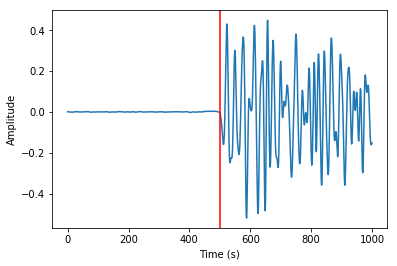

In [11]:
import matplotlib.pyplot as plt
h5f = h5py.File('/home/irene/Documents/Datos-Tesis/Training_window_station_name/HAYA.HHZ.2019.088.14.45.h5', 'r')
print(h5f)
X = h5f['normal'][:]
Y = h5f['transformed'][:]

picker_p = np.argmax(Y)
plt.plot(X)

plt.axvline(x=picker_p , color='red')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
# plt.show()
plt.savefig('Test.png') 